In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

from implementations import *
from helpers import *

In [2]:
# Load the data
x_train, x_test, y_train, train_ids, test_ids, headers = load_csv_data('dataset')
x_train.shape, x_test.shape, y_train.shape

((328135, 321), (109379, 321), (328135,))

In [3]:
headers = [
    "Id", "_STATE", "FMONTH", "IDATE", "IMONTH", "IDAY", "IYEAR", "DISPCODE", "SEQNO", "_PSU", "CTELENUM", "PVTRESD1", "COLGHOUS", 
    "STATERES", "CELLFON3", "LADULT", "NUMADULT", "NUMMEN", "NUMWOMEN", "CTELNUM1", "CELLFON2", "CADULT", "PVTRESD2", "CCLGHOUS", 
    "CSTATE", "LANDLINE", "HHADULT", "GENHLTH", "PHYSHLTH", "MENTHLTH", "POORHLTH", "HLTHPLN1", "PERSDOC2", "MEDCOST", "CHECKUP1", 
    "BPHIGH4", "BPMEDS", "BLOODCHO", "CHOLCHK", "TOLDHI2", "CVDSTRK3", "ASTHMA3", "ASTHNOW", "CHCSCNCR", "CHCOCNCR", "CHCCOPD1", 
    "HAVARTH3", "ADDEPEV2", "CHCKIDNY", "DIABETE3", "DIABAGE2", "SEX", "MARITAL", "EDUCA", "RENTHOM1", "NUMHHOL2", "NUMPHON2", 
    "CPDEMO1", "VETERAN3", "EMPLOY1", "CHILDREN", "INCOME2", "INTERNET", "WEIGHT2", "HEIGHT3", "PREGNANT", "QLACTLM2", "USEEQUIP", 
    "BLIND", "DECIDE", "DIFFWALK", "DIFFDRES", "DIFFALON", "SMOKE100", "SMOKDAY2", "STOPSMK2", "LASTSMK2", "USENOW3", "ALCDAY5", 
    "AVEDRNK2", "DRNK3GE5", "MAXDRNKS", "FRUITJU1", "FRUIT1", "FVBEANS", "FVGREEN", "FVORANG", "VEGETAB1", "EXERANY2", "EXRACT11", 
    "EXEROFT1", "EXERHMM1", "EXRACT21", "EXEROFT2", "EXERHMM2", "STRENGTH", "LMTJOIN3", "ARTHDIS2", "ARTHSOCL", "JOINPAIN", 
    "SEATBELT", "FLUSHOT6", "FLSHTMY2", "IMFVPLAC", "PNEUVAC3", "HIVTST6", "HIVTSTD3", "WHRTST10", "PDIABTST", "PREDIAB1", 
    "INSULIN", "BLDSUGAR", "FEETCHK2", "DOCTDIAB", "CHKHEMO3", "FEETCHK", "EYEEXAM", "DIABEYE", "DIABEDU", "CAREGIV1", "CRGVREL1", 
    "CRGVLNG1", "CRGVHRS1", "CRGVPRB1", "CRGVPERS", "CRGVHOUS", "CRGVMST2", "CRGVEXPT", "VIDFCLT2", "VIREDIF3", "VIPRFVS2", 
    "VINOCRE2", "VIEYEXM2", "VIINSUR2", "VICTRCT4", "VIGLUMA2", "VIMACDG2", "CIMEMLOS", "CDHOUSE", "CDASSIST", "CDHELP", 
    "CDSOCIAL", "CDDISCUS", "WTCHSALT", "LONGWTCH", "DRADVISE", "ASTHMAGE", "ASATTACK", "ASERVIST", "ASDRVIST", "ASRCHKUP", 
    "ASACTLIM", "ASYMPTOM", "ASNOSLEP", "ASTHMED3", "ASINHALR", "HAREHAB1", "STREHAB1", "CVDASPRN", "ASPUNSAF", "RLIVPAIN", 
    "RDUCHART", "RDUCSTRK", "ARTTODAY", "ARTHWGT", "ARTHEXER", "ARTHEDU", "TETANUS", "HPVADVC2", "HPVADSHT", "SHINGLE2", 
    "HADMAM", "HOWLONG", "HADPAP2", "LASTPAP2", "HPVTEST", "HPLSTTST", "HADHYST2", "PROFEXAM", "LENGEXAM", "BLDSTOOL", 
    "LSTBLDS3", "HADSIGM3", "HADSGCO1", "LASTSIG3", "PCPSAAD2", "PCPSADI1", "PCPSARE1", "PSATEST1", "PSATIME", "PCPSARS1", 
    "PCPSADE1", "PCDMDECN", "SCNTMNY1", "SCNTMEL1", "SCNTPAID", "SCNTWRK1", "SCNTLPAD", "SCNTLWK1", "SXORIENT", "TRNSGNDR", 
    "RCSGENDR", "RCSRLTN2", "CASTHDX2", "CASTHNO2", "EMTSUPRT", "LSATISFY", "ADPLEASR", "ADDOWN", "ADSLEEP", "ADENERGY", 
    "ADEAT1", "ADFAIL", "ADTHINK", "ADMOVE", "MISTMNT", "ADANXEV", "QSTVER", "QSTLANG", "MSCODE", "_STSTR", "_STRWT", 
    "_RAWRAKE", "_WT2RAKE", "_CHISPNC", "_CRACE1", "_CPRACE", "_CLLCPWT", "_DUALUSE", "_DUALCOR", "_LLCPWT", "_RFHLTH", 
    "_HCVU651", "_RFHYPE5", "_CHOLCHK", "_RFCHOL", "_LTASTH1", "_CASTHM1", "_ASTHMS1", "_DRDXAR1", "_PRACE1", "_MRACE1", 
    "_HISPANC", "_RACE", "_RACEG21", "_RACEGR3", "_RACE_G1", "_AGEG5YR", "_AGE65YR", "_AGE80", "_AGE_G", "HTIN4", "HTM4", 
    "WTKG3", "_BMI5", "_BMI5CAT", "_RFBMI5", "_CHLDCNT", "_EDUCAG", "_INCOMG", "_SMOKER3", "_RFSMOK3", "DRNKANY5", "DROCDY3_", 
    "_RFBING5", "_DRNKWEK", "_RFDRHV5", "FTJUDA1_", "FRUTDA1_", "BEANDAY_", "GRENDAY_", "ORNGDAY_", "VEGEDA1_", "_MISFRTN", 
    "_MISVEGN", "_FRTRESP", "_VEGRESP", "_FRUTSUM", "_VEGESUM", "_FRTLT1", "_VEGLT1", "_FRT16", "_VEG23", "_FRUITEX", "_VEGETEX", 
    "_TOTINDA", "METVL11_", "METVL21_", "MAXVO2_", "FC60_", "ACTIN11_", "ACTIN21_", "PADUR1_", "PADUR2_", "PAFREQ1_", "PAFREQ2_", 
    "_MINAC11", "_MINAC21", "STRFREQ_", "PAMISS1_", "PAMIN11_", "PAMIN21_", "PA1MIN_", "PAVIG11_", "PAVIG21_", "PA1VIGM_", 
    "_PACAT1", "_PAINDX1", "_PA150R2", "_PA300R2", "_PA30021", "_PASTRNG", "_PAREC1", "_PASTAE1", "_LMTACT1", "_LMTWRK1", 
    "_LMTSCL1", "_RFSEAT2", "_RFSEAT3", "_FLSHOT6", "_PNEUMO2", "_AIDTST3"
]
len(headers[27:])   # And 296 if we add the second column

295

# Cleaning

First, we discard columns related to the interview's condition (date, partiality, ...). We discard the 27 first columns except the second one.

In [4]:
x_tr, x_ts = x_train[:, 26:], x_test[:, 26:]
# Add the second column of x_train to x_tr and x_ts
x_tr = np.column_stack((x_tr, x_train[:, 1]))
x_ts = np.column_stack((x_ts, x_test[:, 1]))
x_tr.shape, x_ts.shape

((328135, 296), (109379, 296))

Next, for every response that was "don't know" (7 or 77) or "Refused" (9 or 99), we will replace these values with zeros after normalization. For now, we turn them to nans so that they don't play a role in the normalization.

In [115]:
# Replace every value of 7, 9, 77, or 99 in x_tr and x_ts with a nan
x_tr[np.isin(x_tr, [7, 77])] = np.nan
x_ts[np.isin(x_ts, [7, 77])] = np.nan

Now we normalize, and then replace the nans with zeros:

In [116]:
# Normalize the data
def normalize(x):
    mean = np.nanmean(x, axis=0)
    std = np.nanstd(x, axis=0)
    return (x - mean) / std

x_tr = normalize(x_tr)
x_ts = normalize(x_ts)

# Replace nan values with 0
x_tr = np.nan_to_num(x_tr, nan=0)
x_ts = np.nan_to_num(x_ts, nan=0)

Now, let's remove the features that are highly correlated with one another:

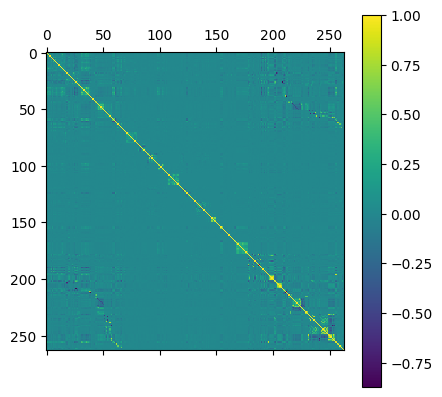

Columns to drop: []


((328135, 263), (109379, 263))

In [117]:
# Plot a correlation matrix of x_tr
plt.matshow(np.corrcoef(x_tr, rowvar=False))
plt.colorbar()
plt.show()

# Remove the features that are correlated above 0.9 or below -0.9 with each other
corr = np.corrcoef(x_tr, rowvar=False)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
to_drop = [column for column in range(corr.shape[1]) if any(abs(corr[column, mask[column]]) > 0.9)]

print(f"Columns to drop: {to_drop}")

x_tr = np.delete(x_tr, to_drop, axis=1)
x_ts = np.delete(x_ts, to_drop, axis=1)
x_tr.shape, x_ts.shape

# Model

Because of the sparsity of the data, we decide to use gradient descent instead of stochastic gradient descent, in order to be sure than every weight is taken into account in the updates.

In [118]:
def split_data(x, y, ratio, seed=1):
    np.random.seed(seed)
    n = len(y)
    indices = np.random.permutation(n)
    n_train = int(np.floor(n * ratio))
    indices_train = indices[:n_train]
    indices_test = indices[n_train:]
    return x[indices_train], x[indices_test], y[indices_train], y[indices_test]

def compute_accuracy(y, y_pred):
    return np.sum(y == y_pred) / len(y)

def compute_f1_score(y, y_pred):
    # True positives: predicted 1 and actual 1
    tp = np.sum((y == 1) & (y_pred == 1))
    # False positives: predicted 1 but actual -1
    fp = np.sum((y == -1) & (y_pred == 1))
    # False negatives: predicted -1 but actual 1
    fn = np.sum((y == 1) & (y_pred == -1))
    
    # Precision and recall, with safety check for division by zero
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    
    return 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

In [119]:
# Add the squared features to the data
x_augm = np.column_stack((x_tr, x_tr**2))

# Add the bias term to the data
x_augm = np.column_stack((np.ones(x_augm.shape[0]), x_tr))

# Do regularized linear regression
lambda_ = 0.1
initial_w = np.zeros(x_augm.shape[1])
max_iters = 5000
gamma = 0.01

# Split the data 
X_tr, X_val, Y_tr, Y_val = split_data(x_augm, y_train, 0.8)

# Compute the optimal weights and loss
w, losses_train, losses_val = reg_logistic_regression(Y_tr, X_tr, lambda_, initial_w, max_iters, gamma, X_val, Y_val)

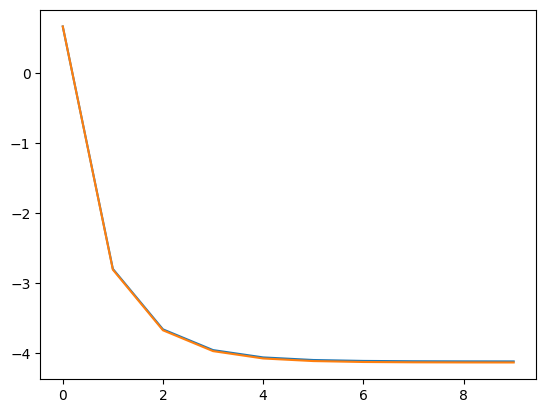

In [120]:
plt.plot(losses_train)
plt.plot(losses_val)

As all of the "yes" are 1 in the original dateaset, they will become negative after normalization, so the more negative it is the more ...

In [128]:
def predict_labels(w, tx):
    return 2 * (tx @ w > -1.8) - 1

# Calculate the accuracy for the training and test sets
pred_tr = predict_labels(w, X_tr)
pred_val = predict_labels(w, X_val)

acc_tr = np.mean(pred_tr == Y_tr)
acc_ts = np.mean(pred_val == Y_val)

f1_tr = compute_f1_score(Y_tr, pred_tr)
f1_ts = compute_f1_score(Y_val, pred_val)

print(f"Accuracy on the training set: {acc_tr}", f"F1 score on the training set: {f1_tr}")
print(f"Accuracy on the test set: {acc_ts}", f"F1 score on the test set: {f1_ts}")

Accuracy on the training set: 0.8538825483413839 F1 score on the training set: 0.40262268529333894
Accuracy on the test set: 0.8543130114129855 F1 score on the test set: 0.3976563976563976


# Decision Tree

We could think that with the calculated variables, there is no need for extra composition of variables, and thus that a decision tree could be a good model.